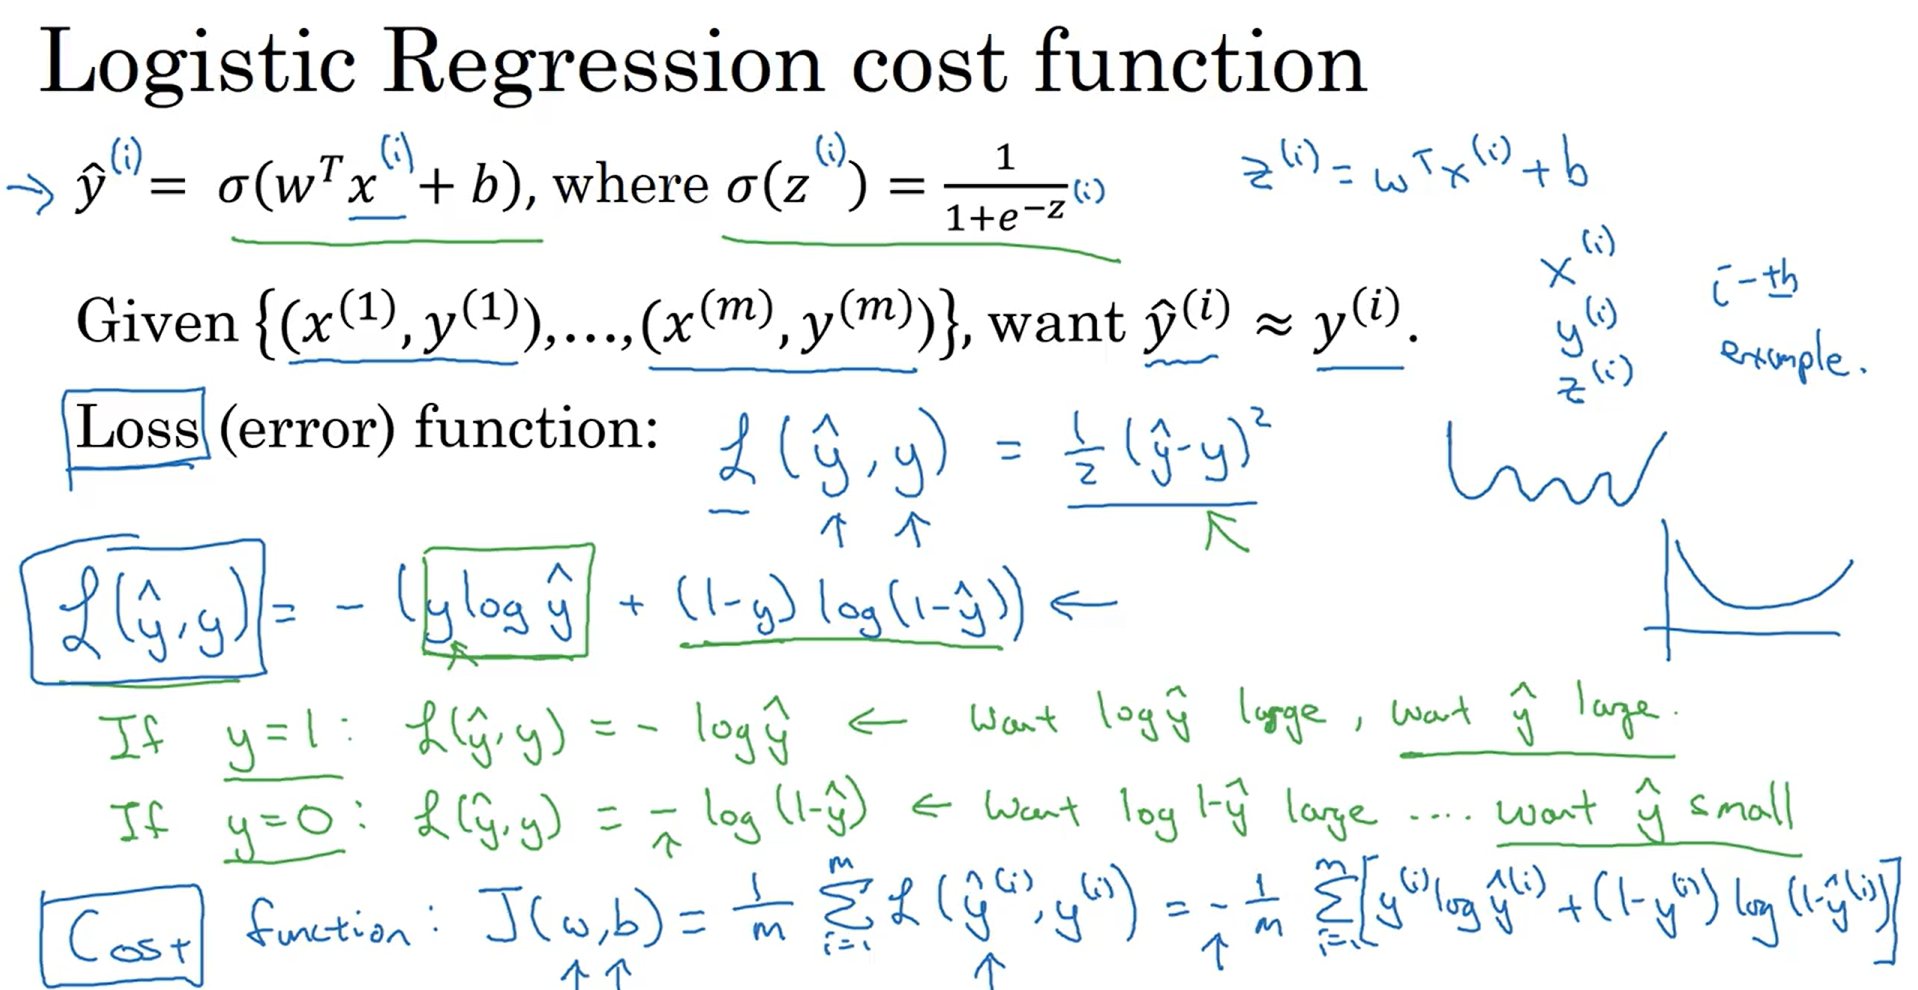

# Phân biệt Loss Function và Cost Function
- Trước hết, cần phân biệt rõ hai khái niệm này:

- Loss Function (Hàm mất mát) L(ŷ, y): Đo lường sự sai lệch giữa dự đoán (ŷ) và giá trị thật (y) trên một mẫu dữ liệu duy nhất. Nó cho bạn biết mô hình của bạn sai đến mức nào cho một ví dụ cụ thể.

- Cost Function (Hàm chi phí) J(w, b): Là thước đo sai sót của mô hình trên toàn bộ tập dữ liệu huấn luyện. Về cơ bản, nó là trung bình cộng của tất cả các Loss từ mỗi mẫu dữ liệu. Mục tiêu của việc huấn luyện là tìm ra w và b để J là nhỏ nhất.

1. Tại sao không dùng hàm L = (1/2)(ŷ - y)²?
- Hàm mất mát bình phương sai số (squared error) này hoạt động rất tốt cho Hồi quy Tuyến tính (Linear Regression). Tuy nhiên, nếu áp dụng nó cho Hồi quy Logistic, nó sẽ gây ra một vấn đề lớn.

- Khi kết hợp hàm mất mát này với hàm dự đoán ŷ = σ(wᵀx + b) của Hồi quy Logistic, Hàm chi phí J(w, b) tổng thể sẽ không phải là một hàm lồi (non-convex).

- Hàm không lồi (Non-convex): Hãy tưởng tượng nó giống như một dãy núi có nhiều thung lũng (như đồ thị hình sóng ~ vẽ tay trên slide). Khi bạn dùng thuật toán tối ưu (như Gradient Descent), bạn rất dễ bị "mắc kẹt" trong một thung lũng cạn (cực tiểu cục bộ) mà không tìm được điểm thấp nhất tuyệt đối (cực tiểu toàn cục).

- Hàm lồi (Convex): Nó chỉ có một đáy duy nhất (hình chữ U), đảm bảo rằng thuật toán tối ưu sẽ luôn tìm được điểm tốt nhất.

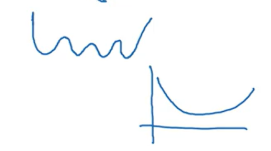

-> Vì vậy, người ta cần một hàm mất mát khác để đảm bảo Cost Function của Hồi quy Logistic là hàm lồi.

2. Giải thích hàm L(ŷ, y) = -[y·log(ŷ) + (1-y)·log(1-ŷ)]
- Đây chính là hàm mất mát được chọn, còn gọi là Log Loss hay Binary Cross-Entropy

- Trường hợp 1: Nhãn thật y = 1 👍
    - Lúc này, vế (1-y) sẽ bằng 0. Công thức trở thành: L(ŷ, 1) = -[1 · log(ŷ) + 0 · log(1-ŷ)] = -log(ŷ) . Để tối thiểu hóa L (tức là làm cho L nhỏ nhất), chúng ta cần làm cho -log(ŷ) nhỏ, tương đương với việc làm cho log(ŷ) lớn nhất có thể.
  
    - -> Điều này xảy ra khi ŷ tiến gần đến 1.

    - -> Kết luận: Khi nhãn thật là 1, hàm mất mát sẽ phạt mô hình nếu nó dự đoán một giá trị xa 1, và thưởng cho mô hình nếu nó dự đoán một giá trị gần 1. Điều này hoàn toàn hợp lý!

- Trường hợp 2: Nhãn thật y = 0 👍
    - Lúc này, vế y sẽ bằng 0. Công thức trở thành:  L(ŷ, 0) = -[0 · log(ŷ) + 1 · log(1-ŷ)] = -log(1-ŷ)  . Để tối thiểu hóa L, chúng ta cần làm cho log(1-ŷ) lớn nhất có thể.

    - -> Điều này xảy ra khi 1-ŷ tiến gần đến 1, tức là ŷ phải tiến gần đến 0.

    - -> Kết luận: Khi nhãn thật là 0, hàm mất mát phạt mô hình nếu nó dự đoán một giá trị xa 0, và thưởng cho mô hình nếu nó dự đoán một giá trị gần 0. Cũng hoàn toàn hợp lý!

- Tóm lại: Hàm mất mát này sử dụng một công thức duy nhất nhưng xử lý thông minh cả hai trường hợp y=1 và y=0, và quan trọng nhất là nó đảm bảo Cost Function J là hàm lồi.

3. Giải thích Cost Function J(w,b)
- Như đã định nghĩa ở trên, Cost Function là "chi phí" tổng thể trên toàn bộ tập huấn luyện.
- J(w,b)=  (1/m).∑(L(ŷ⁽ⁱ⁾, y⁽ⁱ⁾))
Giải thích công thức:

- L(ŷ⁽ⁱ⁾, y⁽ⁱ⁾): Tính "lỗi" cho từng mẫu dữ liệu thứ i.
- ∑: Ký hiệu Sigma, nghĩa là lấy tổng tất cả các "lỗi" này, từ mẫu đầu tiên (i=1) đến mẫu cuối cùng (i=m).

- 1/m: Lấy tổng đó rồi chia cho m (tổng số mẫu). Đây chính là phép tính trung bình cộng.

- ->Vậy, Cost Function J(w, b) đơn giản là sai số trung bình của mô hình trên tất cả các mẫu huấn luyện. Mục tiêu của thuật toán là điều chỉnh w và b để giá trị trung bình này nhỏ nhất có thể.